# Importing Libraries

In [8]:
# Cell 1: Import Libraries and Load Data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

In [43]:
# Load the processed dataset from the EDA phase
df = pd.read_csv('insurance_processed.csv')

# Display the first few rows to verify it's loaded correctly
print("--- Dataset Head ---")
print(df.head())

--- Dataset Head ---
   age     sex   bmi  children smoker     region  expenses bmi_category  \
0   19  female  27.9         0    yes  southwest  16884.92   Overweight   
1   18    male  33.8         1     no  southeast   1725.55        Obese   
2   28    male  33.0         3     no  southeast   4449.46        Obese   
3   33    male  22.7         0     no  northwest  21984.47       Normal   
4   32    male  28.9         0     no  northwest   3866.86   Overweight   

   obese_smoker  
0             0  
1             0  
2             0  
3             0  
4             0  


In [12]:
# Cell 2: Data Preprocessing and Splitting

# Apply log transformation to the target variable 'expenses' to handle its skewness
df['expenses'] = np.log1p(df['expenses'])

# Convert categorical variables into dummy/indicator variables (One-Hot Encoding)
# We drop the first category of each to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Drop the 'bmi_category' as it was for EDA; we'll use the numerical 'bmi' for modeling
df_encoded = df_encoded.drop('bmi_category', axis=1)

# Define our features (X) and target (y)
X = df_encoded.drop('expenses', axis=1)
y = df_encoded['expenses']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the new dataframes to confirm the split
print("--- Data Shapes ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

--- Data Shapes ---
X_train shape: (1070, 9)
X_test shape: (268, 9)
y_train shape: (1070,)
y_test shape: (268,)


In [14]:
# Cell 3: Model 1 - Multiple Linear Regression

# --- 1. Initialize and Train the Model ---
print("--- Training Model 1: Multiple Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Model trained successfully.")

# --- 2. Make Predictions on the Test Set ---
y_pred_lr_log = lr_model.predict(X_test)

# --- 3. Evaluate the Model ---
# To interpret the error in dollars, we transform the predictions and actual values back to the original scale
y_pred_lr = np.expm1(y_pred_lr_log)
y_test_orig = np.expm1(y_test)

# Calculate metrics
r2_lr = r2_score(y_test, y_pred_lr_log)  # R-squared is calculated on the log-transformed values
mae_lr = mean_absolute_error(y_test_orig, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_orig, y_pred_lr))

print("\n--- Model 1 Evaluation ---")
print(f"R-squared (R²): {r2_lr:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_lr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_lr:,.2f}")

--- Training Model 1: Multiple Linear Regression ---
Model trained successfully.

--- Model 1 Evaluation ---
R-squared (R²): 0.8215
Mean Absolute Error (MAE): $3,698.86
Root Mean Squared Error (RMSE): $7,639.51


In [16]:
# Cell 4: Model 2 - Ridge Regression

# --- 1. Initialize and Train the Model ---
print("--- Training Model 2: Ridge Regression ---")
# Alpha is the regularization strength. A higher value means stronger regularization.
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)
print("Model trained successfully.")

# --- 2. Make Predictions on the Test Set ---
y_pred_ridge_log = ridge_model.predict(X_test)

# --- 3. Evaluate the Model ---
# Transform predictions back to the original scale
y_pred_ridge = np.expm1(y_pred_ridge_log)

# Calculate metrics
r2_ridge = r2_score(y_test, y_pred_ridge_log)
mae_ridge = mean_absolute_error(y_test_orig, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test_orig, y_pred_ridge))

print("\n--- Model 2 Evaluation ---")
print(f"R-squared (R²): {r2_ridge:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_ridge:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_ridge:,.2f}")

--- Training Model 2: Ridge Regression ---
Model trained successfully.

--- Model 2 Evaluation ---
R-squared (R²): 0.8215
Mean Absolute Error (MAE): $3,674.08
Root Mean Squared Error (RMSE): $7,573.73


In [18]:
# Cell 5: Model 3 - Gradient Boosting Regressor

# --- 1. Initialize and Train the Model ---
print("--- Training Model 3: Gradient Boosting Regressor ---")
# We use common default parameters and a random_state for reproducibility
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
print("Model trained successfully.")

# --- 2. Make Predictions on the Test Set ---
y_pred_gbr_log = gbr_model.predict(X_test)

# --- 3. Evaluate the Model ---
# Transform predictions back to the original scale
y_pred_gbr = np.expm1(y_pred_gbr_log)

# Calculate metrics
r2_gbr = r2_score(y_test, y_pred_gbr_log)
mae_gbr = mean_absolute_error(y_test_orig, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test_orig, y_pred_gbr))

print("\n--- Model 3 Evaluation ---")
print(f"R-squared (R²): {r2_gbr:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_gbr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_gbr:,.2f}")

--- Training Model 3: Gradient Boosting Regressor ---
Model trained successfully.

--- Model 3 Evaluation ---
R-squared (R²): 0.8676
Mean Absolute Error (MAE): $2,045.68
Root Mean Squared Error (RMSE): $4,455.89


In [33]:
# Cell 7: Model 4 - Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# --- 1. Initialize and Train the Model ---
print("--- Training Model 4: Random Forest Regressor ---")
# n_estimators is the number of trees in the forest. 100 is a common default.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
print("Model trained successfully.")

# --- 2. Make Predictions on the Test Set ---
y_pred_rf_log = rf_model.predict(X_test)

# --- 3. Evaluate the Model ---
# Transform predictions back to the original scale
y_pred_rf = np.expm1(y_pred_rf_log)

# Calculate metrics
r2_rf = r2_score(y_test, y_pred_rf_log)
mae_rf = mean_absolute_error(y_test_orig, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_orig, y_pred_rf))

print("\n--- Model 4 Evaluation ---")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_rf:,.2f}")

--- Training Model 4: Random Forest Regressor ---
Model trained successfully.

--- Model 4 Evaluation ---
R-squared (R²): 0.8472
Mean Absolute Error (MAE): $2,092.97
Root Mean Squared Error (RMSE): $4,401.19


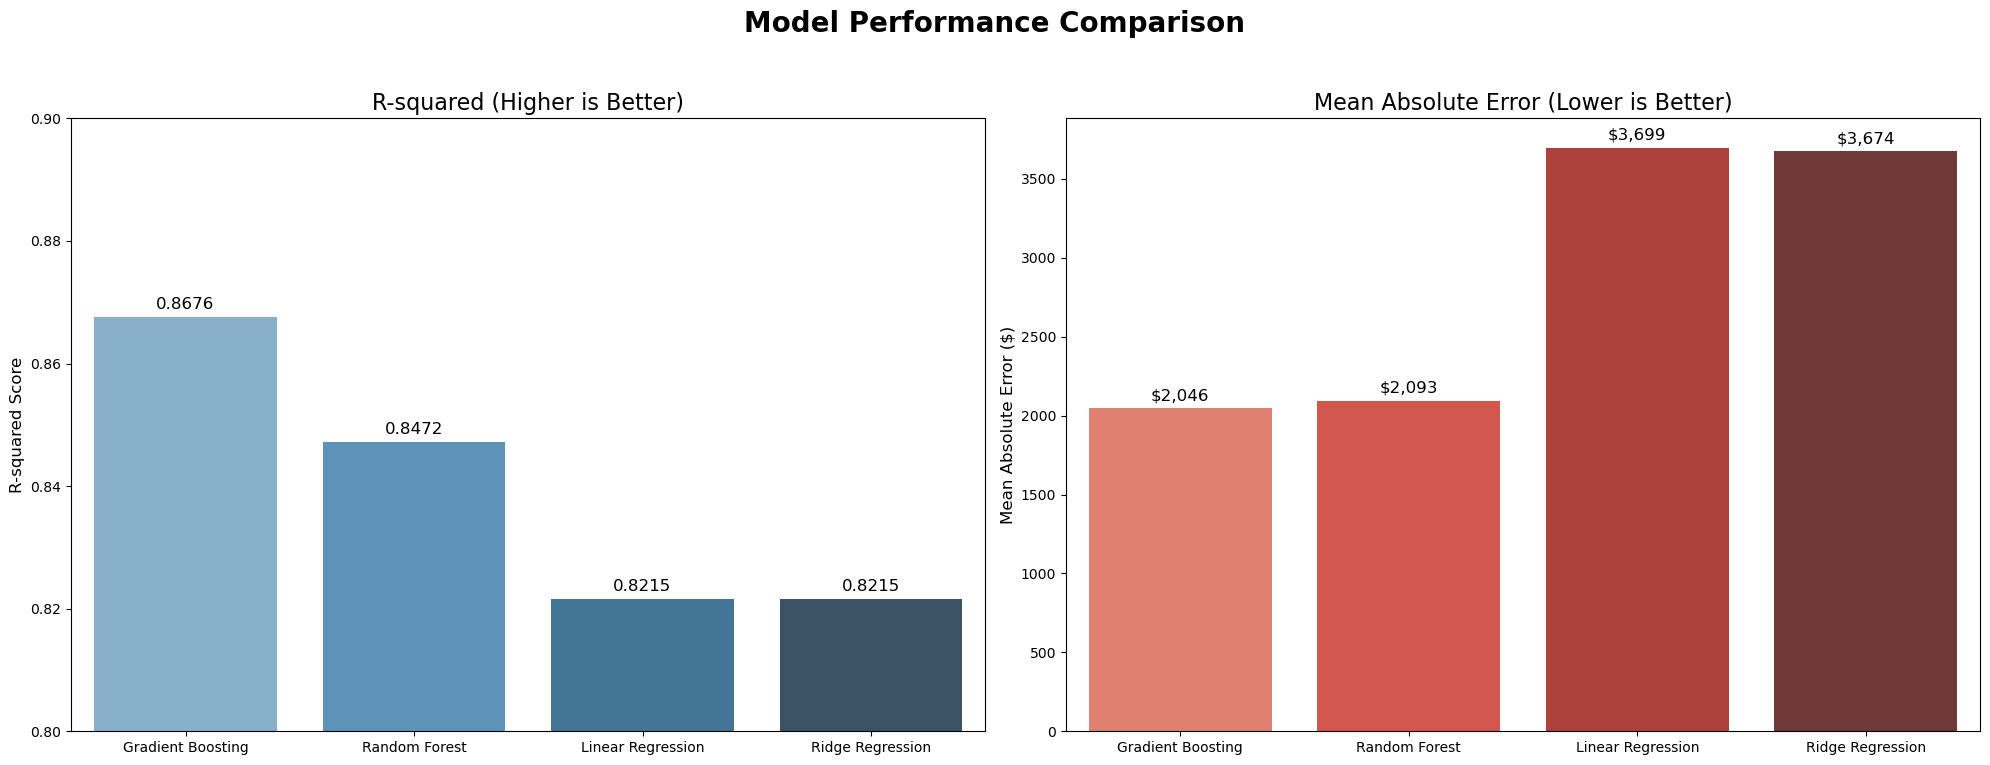

In [39]:
# Cell 8: Final Visual Model Comparison and Conclusion

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Create a Summary DataFrame with all four models ---
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Gradient Boosting', 'Random Forest'],
    'R-squared (R²)': [r2_lr, r2_ridge, r2_gbr, r2_rf],
    'Mean Absolute Error (MAE)': [mae_lr, mae_ridge, mae_gbr, mae_rf],
    'Root Mean Squared Error (RMSE)': [rmse_lr, rmse_ridge, rmse_gbr, rmse_rf]
})

# Sort by R-squared for a clear visual hierarchy
results_df = results_df.sort_values(by='R-squared (R²)', ascending=False)

# --- 2. Create Visualizations ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Model Performance Comparison', fontsize=20, fontweight='bold')

# Plot 1: R-squared Scores
sns.barplot(ax=axes[0], x='Model', y='R-squared (R²)', data=results_df, palette='Blues_d')
axes[0].set_title('R-squared (Higher is Better)', fontsize=16)
axes[0].set_ylabel('R-squared Score', fontsize=12)
axes[0].set_xlabel('')
axes[0].set_ylim(0.80, 0.90) # Zoom in to highlight the differences

# Add annotations for R-squared
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.4f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 9), 
                     textcoords='offset points', fontsize=12)

# Plot 2: Mean Absolute Error (MAE)
sns.barplot(ax=axes[1], x='Model', y='Mean Absolute Error (MAE)', data=results_df, palette='Reds_d')
axes[1].set_title('Mean Absolute Error (Lower is Better)', fontsize=16)
axes[1].set_ylabel('Mean Absolute Error ($)', fontsize=12)
axes[1].set_xlabel('')

# Add annotations for MAE
for p in axes[1].patches:
    axes[1].annotate(f'${p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 9), 
                     textcoords='offset points', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Model Building and Evaluation Summary

### 🎯 Objective
The primary goal of this notebook was to build and evaluate several regression models to predict individual medical expenses using the `insurance` dataset. This process leveraged insights from our earlier Exploratory Data Analysis (EDA).

---

### ⚙️ Methodology

1. **Data Preparation**:
   - **Target Transformation**: Applied `np.log1p` to the `expenses` column to handle right-skewness.
   - **Feature Encoding**: Used One-Hot Encoding for categorical features (`sex`, `smoker`, `region`).
   - **Feature Engineering**: Included the `obese_smoker` interaction feature created during EDA.

2. **Model Selection**:
   - **Multiple Linear Regression**: Served as a baseline model.
   - **Ridge Regression**: Tested regularization impact on linear models.
   - **Gradient Boosting Regressor**: Captured complex, non-linear relationships.
   - **Random Forest Regressor**: Another ensemble model tested for performance and robustness.

3. **Evaluation Metrics**:
   - **R-squared (R²)**: Measures how well the variance in the target is explained.
   - **Mean Absolute Error (MAE)**: Measures average prediction error in dollar terms.
   - **Root Mean Squared Error (RMSE)**: Penalizes larger errors more than MAE.
   - Models were trained on 80% of data and tested on 20%.

---

### 📊 Results

- **Linear & Ridge Regression**:
  - R-squared: ~0.82  
  - MAE: ~$3,700  
  - Solid baseline models with similar performance.

- **Gradient Boosting Regressor**:
  - R-squared: **0.8676**
  - MAE: **~$2,045.68**

- **Random Forest Regressor**:
  - R-squared: **0.8472**
  - MAE: **~$2,092.97**
  - RMSE: **~$4,401.19**

---

### ✅ Conclusion

The **Gradient Boosting Regressor** emerged as the **best-performing model** for this task:

- **R-squared**: 0.8676 (highest)
- **MAE**: ~$2,045.68 (lowest)

Although the **Random Forest Regressor** also performed well with an **R-squared of 0.8472** and **MAE of ~$2,092.97**, it slightly lagged behind Gradient Boosting in both accuracy and consistency.

This confirms the strength of **ensemble models** in capturing complex, non-linear relationships — particularly the **smoking-obesity interaction**, which linear models failed to model effectively.

---

